# Exploring $H_0$

In [34]:
# imports
from importlib import reload
import numpy as np

from zdm.tests import craco
from zdm import iteration as it
from zdm import misc_functions

# Load up CRACO

## $\Gamma$ function for Energy

In [37]:
survey, grid = craco.load_craco(survey_name='CRAFT/CRACO_1', lum_func=0)

Loading survey: CRAFT/CRACO_1
FRB survey succeffully initialised with  100  FRBs
Initialised grid


In [38]:
surveys = [survey]
grids = [grid]

# Check

## Cosmo

In [39]:
grid.state.cosmo

CosmoParams(H0=67.74, Omega_k=0.0, Omega_lambda=0.6910098315260953, Omega_m=0.3075, Omega_b=0.0486, Omega_b_h2=0.022301118935999998, fix_Omega_b_h2=True)

## Energy

In [40]:
grid.state.energy

EnergeticsParams(lEmin=30.0, lEmax=41.4, alpha=0.65, gamma=-1.01, luminosity_function=0)

# "Best" Model (i.e. known values)

In [51]:
vparams = {}
vparams['lC'] = -0.9
vparams['H0'] = 68.

## Grab the constant

In [52]:
C,llC,lltot=it.minimise_const_only(
            vparams,grids,surveys, Verbose=False)
vparams['lC'] = C
#
C,llC,lltot=it.minimise_const_only(
            vparams,grids,surveys, Verbose=False)
vparams['lC'] = C
lls_final,alist,expected= it.calc_likelihoods_2D(
                    grid, survey, vparams['lC'],
                    norm=True,psnr=True,dolist=1)
C, lls_final

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:519: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


(2.518739110823454, -555.735194409033)

## Plot

/data/Projects/FRB_Software/zdm/zdm/misc_functions.py:2115: RuntimeWarning: divide by zero encountered in log10
  zDMgrid=np.log10(zDMgrid)


Host: mean=278.77755364720525, median=151.3561248436209


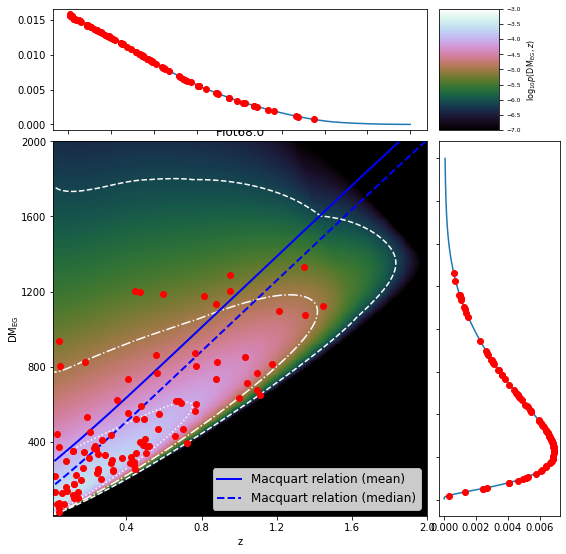

In [53]:
misc_functions.plot_grid_2(grid.rates,grid.zvals,grid.dmvals,zmax=2,DMmax=2000,
                             name="Normal_H0.pdf",
                             norm=2,log=True,label='$\\log_{10} p({\\rm DM}_{\\rm EG},z)$',
                             project=True,FRBDM=survey.DMEGs,FRBZ=survey.frbs["Z"],Aconts=[0.01,0.1,0.5],
                           Macquart=grid.state, showplot=True)

# Increase $H_0$

In [44]:
survey2, grid2 = craco.load_craco(survey_name='CRAFT/CRACO_1', lum_func=0)

Loading survey: CRAFT/CRACO_1
FRB survey succeffully initialised with  100  FRBs
Initialised grid


In [45]:
surveys2 = [survey2]
grids2 = [grid2]

In [46]:
vparams2 = {}
vparams2['lC'] = -0.9
vparams2['H0'] = 75.

In [47]:
C,llC,lltot=it.minimise_const_only(
            vparams2,grids2,surveys2, Verbose=False)
vparams2['lC'] = C
#
C,llC,lltot=it.minimise_const_only(
            vparams2,grids2,surveys2, Verbose=False)
vparams2['lC'] = C
C, lltot

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:519: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


(2.522520799990863, -553.128390608478)

## Check

In [48]:
grid2.state.cosmo

CosmoParams(H0=75.0, Omega_k=0.0, Omega_lambda=0.6910098315260953, Omega_m=0.3075, Omega_b=0.039646433663999996, Omega_b_h2=0.022301118935999998, fix_Omega_b_h2=True)

## Plot

/data/Projects/FRB_Software/zdm/zdm/misc_functions.py:2115: RuntimeWarning: divide by zero encountered in log10
  zDMgrid=np.log10(zDMgrid)


Host: mean=278.77755364720525, median=151.3561248436209


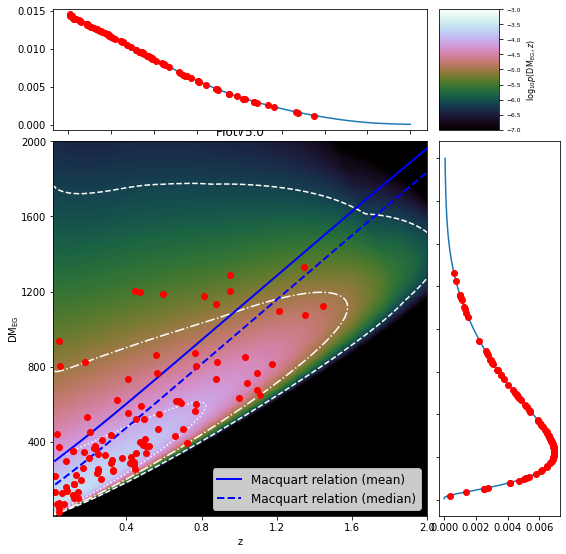

In [49]:
misc_functions.plot_grid_2(grid2.rates,grid2.zvals,grid2.dmvals,zmax=2,DMmax=2000,
                             name="Higher_H0.pdf",
                             norm=2,log=True,label='$\\log_{10} p({\\rm DM}_{\\rm EG},z)$',
                             project=True,FRBDM=survey2.DMEGs,FRBZ=survey2.frbs["Z"],Aconts=[0.01,0.1,0.5],
                           Macquart=grid2.state, showplot=True)

# Compare rates

## Sum

In [54]:
np.sum(grid.rates), np.sum(grid2.rates)

(0.0031337116403217995, 0.0031065428015521444)

In [35]:
rates_high_norm = grid2.rates / grid.rates

/tmp/ipykernel_224225/3146957592.py:1: RuntimeWarning: divide by zero encountered in true_divide
  rates_high_norm = grid2.rates / grid.rates
/tmp/ipykernel_224225/3146957592.py:1: RuntimeWarning: invalid value encountered in true_divide
  rates_high_norm = grid2.rates / grid.rates


In [56]:
np.nanmedian(rates_high_norm)

0.9506856817370983